<a href="https://colab.research.google.com/github/prithviemmidi/Dissertation/blob/main/MNIST_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import datasets, models, layers, regularizers
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from tensorflow.keras.layers import Dropout

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Normalize

train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])
    return model

In [6]:
def build_l2_model():
    l2 = tf.keras.regularizers.l2(0.001)
    return tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2),
        tf.keras.layers.Dense(10, activation='softmax')])

In [7]:
def build_l1_model():
    l1 = tf.keras.regularizers.l1(0.001)
    return tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l1),
        tf.keras.layers.Dense(10, activation='softmax')])

In [8]:
def build_dropout_model():
    return tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
regularisation_models = {
    "No Regularisation": build_model,
    "L1": build_l1_model,
    "L2": build_l2_model,
    "Dropout": build_dropout_model}

optimisers = {
    "MB-GD": lambda: SGD(),
    "AdaGrad": lambda: Adagrad(),
    "AdaDelta": lambda: Adagrad(),
    "RMSprop": lambda: RMSprop(),
    "Adam": lambda: Adam()}

results = []
histories = {}

In [10]:
for reg_name, build_fn in regularisation_models.items():
    for opt_name, opt_fn in optimisers.items():
        model = build_fn()
        model.compile(optimizer=opt_fn(),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(
            train_images, train_labels,
            validation_split=0.2,
            epochs=10,
            batch_size=100)

        histories[f"{reg_name}_{opt_name}"] = history

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4926 - loss: 1.9183 - val_accuracy: 0.8732 - val_loss: 0.4261
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8867 - loss: 0.3734 - val_accuracy: 0.9302 - val_loss: 0.2379
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9283 - loss: 0.2387 - val_accuracy: 0.9517 - val_loss: 0.1682
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9468 - loss: 0.1711 - val_accuracy: 0.9611 - val_loss: 0.1366
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9597 - loss: 0.1336 - val_accuracy: 0.9688 - val_loss: 0.1119
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.1126 - val_accuracy: 0.9705 - val_loss: 0.1006
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0943 - val_accuracy: 0.9750 - val_loss: 0.0883
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0816 - val_accuracy: 0

In [11]:
for key, history in histories.items():
    reg_name, opt_name = key.split("_", 1)

    best_val_acc = max(history.history['val_accuracy'])
    best_train_acc = max(history.history['accuracy'])

    results.append({
        "Regularisation": reg_name,
        "Optimiser": opt_name,
        "Best Training Accuracy": round(best_train_acc, 4),
        "Best Validation Accuracy": round(best_val_acc, 4)})

In [12]:
results_df = pd.DataFrame(results)
print(results_df)

       Regularisation Optimiser  Best Training Accuracy  \
0   No Regularisation     MB-GD                  0.9790   
1   No Regularisation   AdaGrad                  0.9265   
2   No Regularisation  AdaDelta                  0.9261   
3   No Regularisation   RMSprop                  0.9987   
4   No Regularisation      Adam                  0.9976   
5                  L1     MB-GD                  0.9406   
6                  L1   AdaGrad                  0.9005   
7                  L1  AdaDelta                  0.9088   
8                  L1   RMSprop                  0.9693   
9                  L1      Adam                  0.9695   
10                 L2     MB-GD                  0.9763   
11                 L2   AdaGrad                  0.9235   
12                 L2  AdaDelta                  0.9286   
13                 L2   RMSprop                  0.9872   
14                 L2      Adam                  0.9872   
15            Dropout     MB-GD                  0.9545 

In [13]:
# Validation Accuracy

validation_acc = results_df.pivot(index = "Optimiser", columns = "Regularisation", values = "Best Validation Accuracy")
print(validation_acc)

Regularisation  Dropout      L1      L2  No Regularisation
Optimiser                                                 
AdaDelta         0.9255  0.9190  0.9378             0.9357
AdaGrad          0.9205  0.9081  0.9350             0.9365
Adam             0.9926  0.9743  0.9862             0.9913
MB-GD            0.9740  0.9467  0.9739             0.9767
RMSprop          0.9923  0.9718  0.9877             0.9923


In [14]:
# Training Accuracy

training_acc = results_df.pivot(index = "Optimiser", columns = "Regularisation", values = "Best Training Accuracy")
print(training_acc)

Regularisation  Dropout      L1      L2  No Regularisation
Optimiser                                                 
AdaDelta         0.8749  0.9088  0.9286             0.9261
AdaGrad          0.8676  0.9005  0.9235             0.9265
Adam             0.9931  0.9695  0.9872             0.9976
MB-GD            0.9545  0.9406  0.9763             0.9790
RMSprop          0.9947  0.9693  0.9872             0.9987


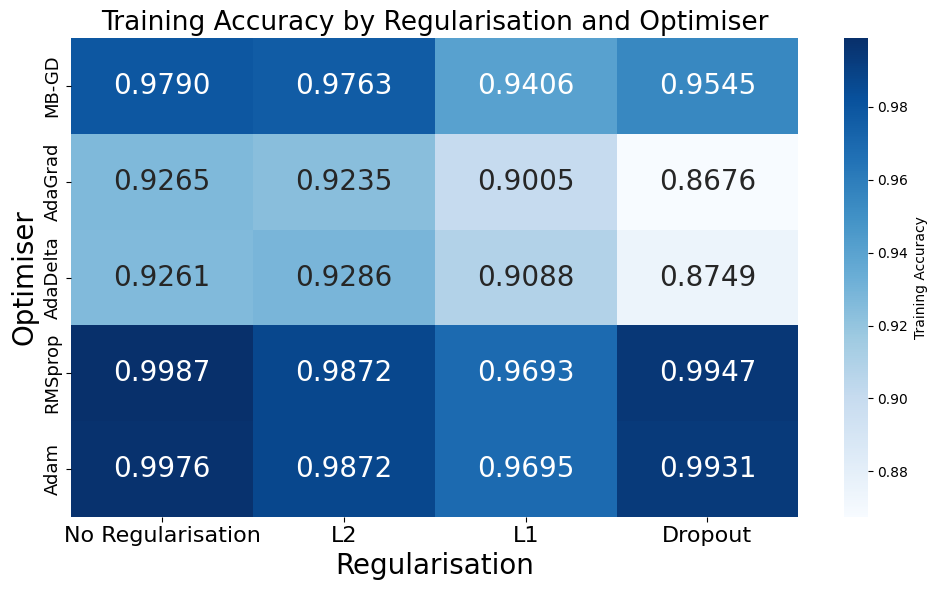

In [17]:
row_order = ["MB-GD", "AdaGrad", "AdaDelta", "RMSprop", "Adam"]
col_order = ["No Regularisation", "L2", "L1", "Dropout"]
pivot_order = results_df.pivot(index = "Optimiser", columns = "Regularisation", values = "Best Training Accuracy")
pivot_order = pivot_order.reindex(index=row_order, columns=col_order)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_order,
    annot=True,
    fmt=".4f",
    cmap="Blues",
    cbar_kws={'label': 'Training Accuracy'},
    annot_kws={"size": 20})

plt.title("Training Accuracy by Regularisation and Optimiser", fontsize=19)
plt.xlabel("Regularisation", fontsize=20)
plt.ylabel("Optimiser", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

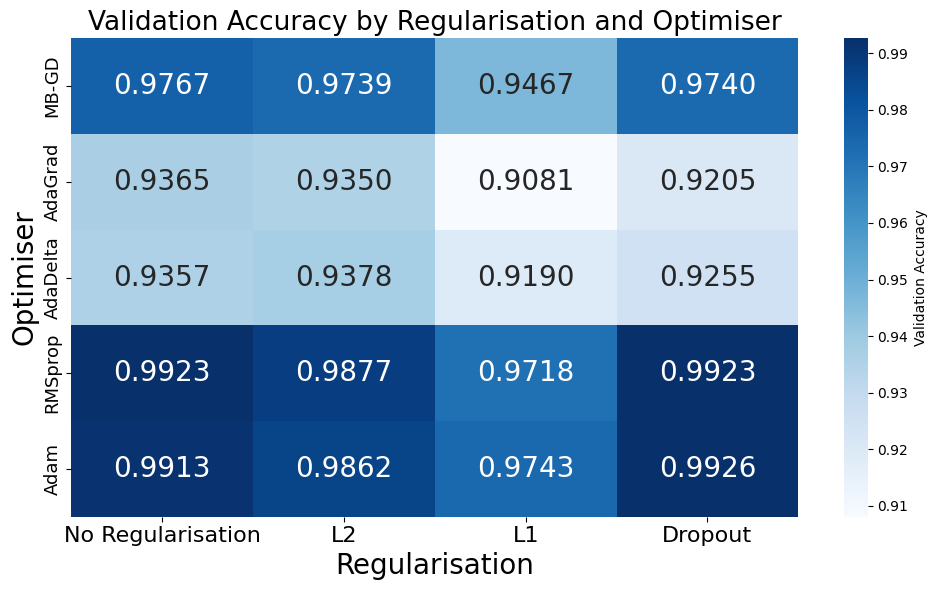

In [18]:
row_order = ["MB-GD", "AdaGrad", "AdaDelta", "RMSprop", "Adam"]
col_order = ["No Regularisation", "L2", "L1", "Dropout"]
pivot_order2 = results_df.pivot(index="Optimiser", columns="Regularisation", values="Best Validation Accuracy")
pivot_order2 = pivot_order2.reindex(index = row_order, columns = col_order)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_order2,
    annot=True,
    fmt=".4f",
    cmap="Blues",
    cbar_kws={'label': 'Validation Accuracy'},
    annot_kws={"size": 20})

plt.title("Validation Accuracy by Regularisation and Optimiser", fontsize=19)
plt.xlabel("Regularisation", fontsize=20)
plt.ylabel("Optimiser", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()